Create an “Academic performance” dataset of students and perform the following operations 
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation 
should be one of the following reasons: to change the scale for better understanding of the 
variable, to convert a non-linear relation into a linear one, or to decrease the skewness and 
convert the distribution into a normal distribution.
Reason and document your approach properly.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('data.csv')

print(data.head())

   Roll Number First Name Last Name  Mobile Number  CGPA1  CGPA2  age
0          261      Rishi     Gupta   919954629666   9.92   5.06   19
1          827      Seema     Singh   919085484267   0.22   2.83   20
2          566      Pooja       Rao   919692747629   4.00   5.78   20
3          431     Vikram   Trivedi   919289900918   3.93    NaN   20
4          688      Rishi      Nair   918510327681   0.34   3.35   22


In [17]:
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
# inconsistencies, use any of the suitable techniques to deal with them.

# Check for missing values
print(data.isnull().sum())

Roll Number      0
First Name       0
Last Name        0
Mobile Number    0
CGPA1            5
CGPA2            3
age              0
dtype: int64


In [18]:
# Check for inconsistencies
print(data.describe())

       Roll Number  Mobile Number      CGPA1      CGPA2         age
count    50.000000   5.000000e+01  45.000000  47.000000   50.000000
mean    492.440000   9.185083e+11   5.092444   4.586170   22.780000
std     250.705792   9.131771e+08   3.068496   2.688698   22.994489
min      15.000000   9.170212e+11   0.000000   0.250000    2.000000
25%     288.000000   9.176502e+11   2.920000   2.730000   18.000000
50%     527.500000   9.186161e+11   4.750000   4.080000   19.500000
75%     659.000000   9.192426e+11   8.110000   6.580000   22.750000
max     994.000000   9.199546e+11   9.920000   9.720000  180.000000


In [19]:
# fill missing values with the mean of the column on CGPA1 and CGPA2
data['CGPA1'] = data['CGPA1'].fillna(data['CGPA1'].mean())
data['CGPA2'] = data['CGPA2'].fillna(data['CGPA2'].mean())


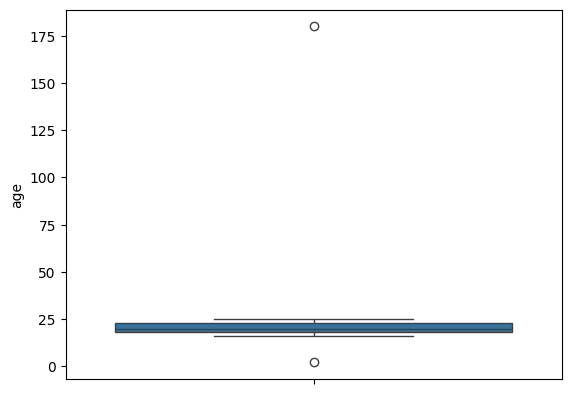

In [20]:
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
# to deal with them.

# Check for outliers
sns.boxplot(data['age'])
plt.show()

In [21]:
# look for outliers in the age column
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

IQR = Q3 - Q1

print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

Q1:  18.0
Q3:  22.75
IQR:  4.75


In [22]:
# print the number of outliers
outliers = data[(data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR))]
print(outliers)


    Roll Number First Name Last Name  Mobile Number  CGPA1  CGPA2  age
6           532  Vaishnavi       Jha   919009969408   5.63   4.38    2
27          722  Vaishnavi     Patel   917550452611   9.49   3.29  180


In [23]:
# replace outliers with the mode

data['age'] = data['age'].mask(data['age'] > Q3 + 1.5 * IQR, data['age'].mode()[0])
data['age'] = data['age'].mask(data['age'] < Q1 - 1.5 * IQR, data['age'].mode()[0])

print(data['age'])

0     19
1     20
2     20
3     20
4     22
5     19
6     16
7     23
8     18
9     24
10    17
11    16
12    19
13    22
14    23
15    21
16    16
17    25
18    16
19    24
20    19
21    18
22    18
23    23
24    22
25    23
26    20
27    16
28    24
29    16
30    23
31    24
32    23
33    18
34    16
35    18
36    16
37    22
38    22
39    19
40    23
41    19
42    22
43    16
44    17
45    22
46    19
47    16
48    16
49    19
Name: age, dtype: int64


In [24]:
# 3. Apply data transformations on at least one of the variables. The purpose of this transformation 
# should be one of the following reasons: to change the scale for better understanding of the 
# variable, to convert a non-linear relation into a linear one, or to decrease the skewness and 
# convert the distribution into a normal distribution.
# Reason and document your approach properly.

# The age column has a centered data. We can apply a log transformation to the age column to 
# convert the distribution into a normal distribution.

# log transformation
data['age'] = data['age'].apply(lambda x: np.log(x) if x > 0 else 0)

# display the transformed data
print(data['age'])


0     2.944439
1     2.995732
2     2.995732
3     2.995732
4     3.091042
5     2.944439
6     2.772589
7     3.135494
8     2.890372
9     3.178054
10    2.833213
11    2.772589
12    2.944439
13    3.091042
14    3.135494
15    3.044522
16    2.772589
17    3.218876
18    2.772589
19    3.178054
20    2.944439
21    2.890372
22    2.890372
23    3.135494
24    3.091042
25    3.135494
26    2.995732
27    2.772589
28    3.178054
29    2.772589
30    3.135494
31    3.178054
32    3.135494
33    2.890372
34    2.772589
35    2.890372
36    2.772589
37    3.091042
38    3.091042
39    2.944439
40    3.135494
41    2.944439
42    3.091042
43    2.772589
44    2.833213
45    3.091042
46    2.944439
47    2.772589
48    2.772589
49    2.944439
Name: age, dtype: float64


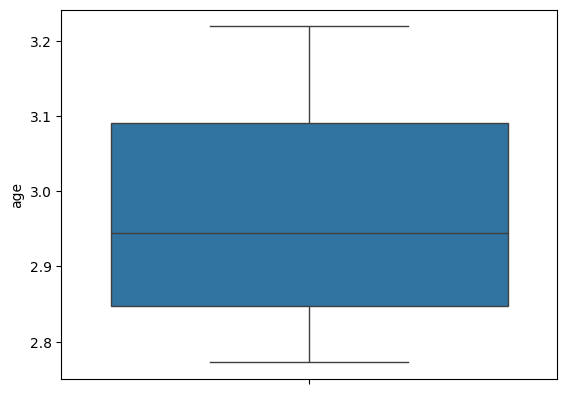

In [25]:
# show age distribution after transformation in boxplot
sns.boxplot(data['age'])
plt.show()
